<a href="https://colab.research.google.com/github/p72/mypython/blob/master/SIR_ColabNotebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 SIRモデル シミュレーションゆるっと入門♨️ (Part 1)
詳しい解説は[note記事](https://note.com/preview/n0486cdd1e10d?prev_access_key=bbbbcba31058d663d62f442897817ff4)をどうぞ。

（Python的にキレイなコードではないと思いますが、自分的分かりやすさを重視して書きました。
他の人にも分かりやすいことを祈る……）

Text(0.5, 1.0, 'SIR simulation for beta=0.9, gamma=0.3')

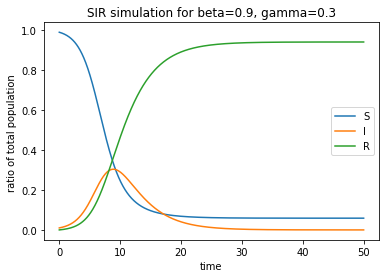

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# xの次の瞬間の値をEuler法で求める関数（xはいくつかの変数のリスト）
def euler(x, dt, f, params):
  dxdt = f(x, params)     # 解きたい微分方程式の右辺f(x)を求めて左辺dx/dtを求める
  x_new = []
  for n in range(len(x)):             # xに入っている変数の数だけ繰り返す
    x_new.append(x[n] + dxdt[n]*dt)   # Euler法「次の値＝今の値＋変化率×一瞬」
  return x_new

# SIR方程式の右辺を求める関数
def SIRode(x, params):
  I,R = x                 # リストになっているxからI,Rを取り出す
  beta,gamma = params     # リストになっているparamsからbeta,gammaを取り出す
  S = 1.0-(I+R)           # S+I+R=1（全人口比に換算してあるので1）
  dIdt = beta*S*I - gamma*I
  dRdt = gamma*I
  return [dIdt, dRdt]     # 左辺を再びリストにして返す

# パラメータβ、γを定義
beta = 0.9
gamma = 0.3
params = [beta,gamma]     # リストにまとめておく

# S,I,Rの初期値を設定
I_0 = 0.01
R_0 = 0.0
S_0 = 1.0-(I_0+R_0)

# 時間のリストを用意
dt = 0.001                # 時間の間隔（「一瞬」の長さ）
t_start = 0.0             # 開始時間
t_end = 50.0              # 終了時間
timepoints = np.linspace(t_start,t_end,num=int((t_end-t_start)/dt)).tolist()

# SIR方程式を解く
S = [S_0]
I = [I_0]
R = [R_0]
for t in timepoints:      # 一瞬一瞬の計算を繰り返すループ
  IR = [I[-1],R[-1]]      # 今の値
  IR_new = euler(IR,dt,SIRode,params) # Euler法を使って次の瞬間のI,Rの値を求める
  I_new,R_new = IR_new    # 次の値
  S_new = 1-(I_new+R_new) # SはI,Rから自動的に求まる
  S.append(S_new)         # 新しい値をリストに追加する
  I.append(I_new)
  R.append(R_new)

# 解をプロットする
plt.plot(timepoints,S[:-1],label="S")
plt.plot(timepoints,I[:-1],label="I")
plt.plot(timepoints,R[:-1],label="R")
plt.legend()
plt.xlabel("time")
plt.ylabel("ratio of total population ")
plt.title("SIR simulation for beta="+str(beta)+", gamma="+str(gamma))